In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [11]:
df = pd.read_csv('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [12]:
y = df['Weight']
x = df.drop(['Weight'], axis=1)

In [13]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [14]:
df.shape

(2111, 17)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [16]:
# Transforming the Features
x_transformed = pd.get_dummies(x, drop_first=True)

In [17]:
# 1. Define weight categories (example)
weight_categories = {
    0: (0, 50),  # Underweight
    1: (50, 75),  # Normal weight
    2: (75, 100), # Overweight
    3: (100, float('inf'))  # Obese
}

In [27]:
y_train_categorical = pd.cut(y_train,
                             bins=[cat[0] for cat in weight_categories.values()] + [float('inf')],
                             labels=weight_categories.keys(),
                             right=False)
y_test_categorical = pd.cut(y_test,
                            bins=[cat[0] for cat in weight_categories.values()] + [float('inf')],
                            labels=weight_categories.keys(),
                            right=False)

In [19]:
from sklearn.preprocessing import StandardScaler

In [23]:
# Scale the features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.2, random_state=50)

In [24]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression(max_iter=5000, solver='lbfgs', penalty='l2', tol=1e-5)

In [30]:
lr.fit(x_train, y_train_categorical)

LogisticRegression(max_iter=5000, tol=1e-05)

In [31]:
lr.intercept_[0]

10.954514469546728

In [34]:
coeff_df = pd.DataFrame(lr.coef_, columns=x_transformed.columns, index=weight_categories.keys())
coeff_df = coeff_df.T  # Transpose to have features as rows and classes as columns
coeff_df = coeff_df.add_prefix('Coefficient_') # Adding prefix to coefficient for each class
display(coeff_df)

,Coefficient_0,Coefficient_1,Coefficient_2,Coefficient_3
Age,-0.066495,-0.043015,0.053587,0.055923
Height,-2.852269,-2.949815,1.872874,3.929210
FCVC,0.052282,-0.274259,-0.174402,0.396379
NCP,-0.401808,0.378200,0.170257,-0.146649
CH2O,-0.098022,-0.209448,-0.101014,0.408484
FAF,0.263904,-0.208088,0.050889,-0.106705
TUE,-0.180567,0.319726,0.054573,-0.193732
Gender_Male,-3.164574,-0.738035,0.850673,3.051936
family_history_with_overweight_yes,-1.586294,-0.136634,0.312487,1.410441
FAVC_yes,-0.893268,-0.425162,0.746707,0.571723


In [38]:
pred_lr = lr.predict(x_test)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

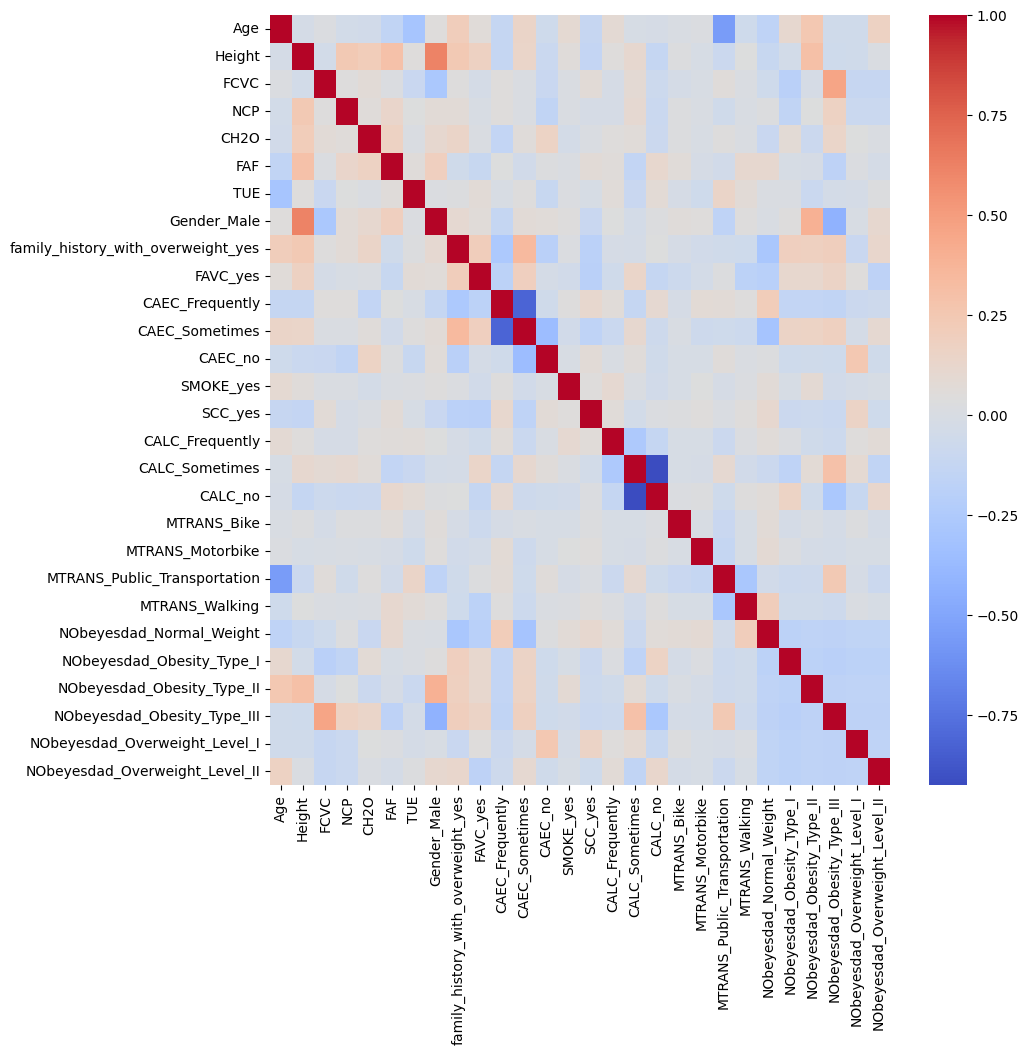

In [41]:
# Correlation heatmap
plt.figure(figsize=(10, 10))
# Assuming 'x_transformed' or 'x' contains your features:
sns.heatmap(x_transformed.corr(), annot=False, cmap='coolwarm')
plt.show()

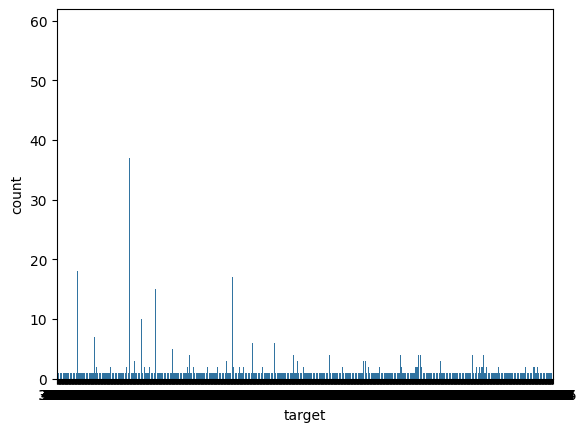

In [43]:
# Balance of target variable
df_target = pd.DataFrame({'target': y})
sns.countplot(x='target', data=df_target)
plt.show()

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Calculate accuracy on test data
accuracy = accuracy_score(y_test_categorical, pred_lr)
print(f"Model accuracy: {accuracy}")

# Generate confusion matrix and classification report using the same data types
conf_matrix = confusion_matrix(y_test_categorical, pred_lr)
class_report = classification_report(y_test_categorical, pred_lr)
print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Classification Report:\n{class_report}")

# Interpret model coefficients
coefficients = pd.DataFrame(lr.coef_[0], index=x_transformed.columns, columns=['Coefficient'])
top_features = coefficients.abs().sort_values('Coefficient', ascending=False).head(3)
print("Top 3 features contributing to malignancy prediction:")
print(top_features)

Model accuracy: 0.9101654846335697
Confusion Matrix:
[[ 19   5   0   0]
 [  3  96   4   0]
 [  1   7 123   5]
 [  0   0  13 147]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.89      0.93      0.91       103
           2       0.88      0.90      0.89       136
           3       0.97      0.92      0.94       160

    accuracy                           0.91       423
   macro avg       0.89      0.89      0.89       423
weighted avg       0.91      0.91      0.91       423

Top 3 features contributing to malignancy prediction:
                           Coefficient
Gender_Male                   3.164574
Height                        2.852269
NObeyesdad_Obesity_Type_I     2.743686


In [56]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# Feature Selection using Recursive Feature Elimination (RFE)
selector = RFE(estimator=LogisticRegression(solver='lbfgs', max_iter=1000), n_features_to_select=10, step=1)
# Fit RFE using the scaled features and the CATEGORICAL target variable
x_train_selected = selector.fit_transform(x_train_scaled, y_train_categorical)
x_test_selected = selector.transform(x_test_scaled)

# Hyperparameter Tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
# Removed multi_class='auto' to avoid FutureWarning
# Increased max_iter to 1000
grid_search = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=1000), param_grid, cv=5)
# Fit GridSearchCV using the selected features and the CATEGORICAL target variable
grid_search.fit(x_train_selected, y_train_categorical)

# Evaluating the best model from GridSearchCV
best_model = grid_search.best_estimator_
# Evaluate the model using the CATEGORICAL target variable
best_accuracy = accuracy_score(y_test_categorical, best_model.predict(x_test_selected))
best_conf_matrix = confusion_matrix(y_test_categorical, best_model.predict(x_test_selected))
best_class_report = classification_report(y_test_categorical, best_model.predict(x_test_selected))

# Output the improved results
print(f"Improved Model Accuracy: {best_accuracy}")
print(f"Improved Confusion Matrix:\n{best_conf_matrix}\n")
print(f"Improved Classification Report:\n{best_class_report}")

Improved Model Accuracy: 0.9550827423167849
Improved Confusion Matrix:
[[ 18   6   0   0]
 [  2  98   3   0]
 [  0   3 131   2]
 [  0   0   3 157]]

Improved Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.92      0.95      0.93       103
           2       0.96      0.96      0.96       136
           3       0.99      0.98      0.98       160

    accuracy                           0.96       423
   macro avg       0.94      0.91      0.92       423
weighted avg       0.96      0.96      0.95       423

